In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('molecular_activity.csv')
df["prop_3"] = df["prop_3"].str.replace(" ", "").astype("float32")

properties = list(df.columns.values)
properties.remove('Activity')
print(properties)
X = df[properties]
y = df['Activity']

['prop_1', 'prop_2', 'prop_3', 'prop_4']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
	keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [10]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=34, batch_size=1, validation_data=(X_val, y_val))

Epoch 1/34
345/345 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.7101 - val_loss: 0.3358 - val_accuracy: 0.6437
Epoch 2/34
345/345 [==============================] - 0s 953us/step - loss: 0.2616 - accuracy: 0.7101 - val_loss: 0.3338 - val_accuracy: 0.6552
Epoch 3/34
345/345 [==============================] - 0s 793us/step - loss: 0.2593 - accuracy: 0.7246 - val_loss: 0.3360 - val_accuracy: 0.6552
Epoch 4/34
345/345 [==============================] - 0s 814us/step - loss: 0.2595 - accuracy: 0.7246 - val_loss: 0.3345 - val_accuracy: 0.6552
Epoch 5/34
345/345 [==============================] - 0s 830us/step - loss: 0.2588 - accuracy: 0.7275 - val_loss: 0.3335 - val_accuracy: 0.6552
Epoch 6/34
345/345 [==============================] - 0s 997us/step - loss: 0.2580 - accuracy: 0.7246 - val_loss: 0.3339 - val_accuracy: 0.6552
Epoch 7/34
345/345 [==============================] - 0s 786us/step - loss: 0.2577 - accuracy: 0.7275 - val_loss: 0.3334 - val_accuracy: 0

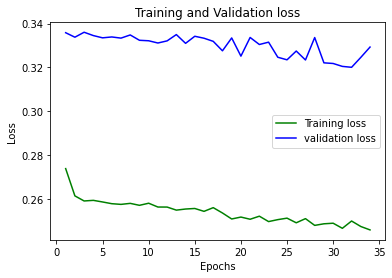

In [12]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()